In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Arpit/titanic/train.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Exploratory Data Analysis

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

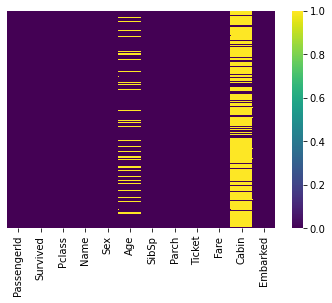

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

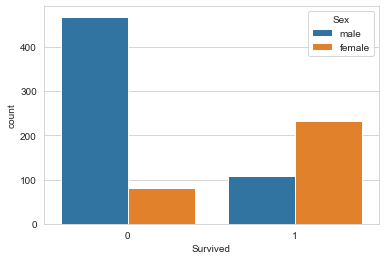

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

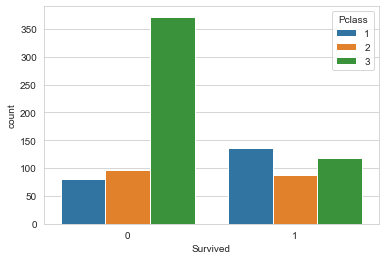

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=df)

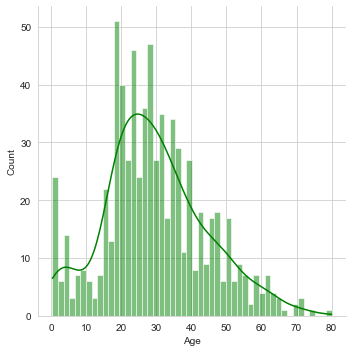

In [8]:
sns.displot(df['Age'], kde=True, bins=50, color='green')

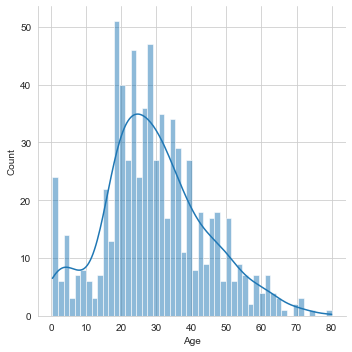

In [9]:
sns.displot(df['Age'].dropna(), kde=True, bins=50)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

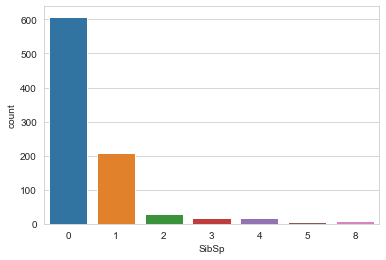

In [10]:
sns.countplot(x='SibSp', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

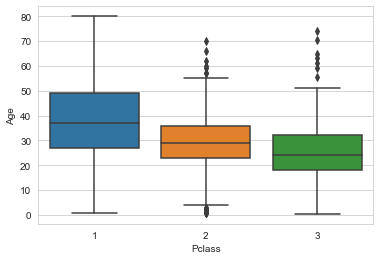

In [11]:
sns.boxplot(x='Pclass', y='Age', data=df)

From the box plot we conclude that the passengers in the higher class are tend to be older as compared to lower class. As the average age of passenger in class 1 is some what around 37-38, class 2 is around 28-29 and 24-25 is for class 3.

Now based on the above analysis we will impute the missing values in age column.

In [12]:
def impuge_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
        
    else:
        return Age

In [13]:
df['Age'] = df[['Age','Pclass']].apply(impuge_age, axis=1)

<AxesSubplot:>

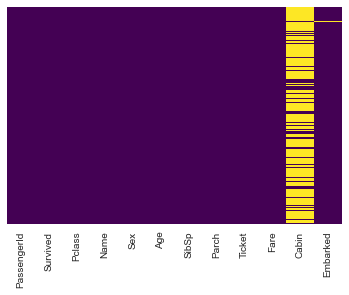

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we have very large number of NaN values so we need to drop cabin column.

In [16]:
df.drop('Cabin', axis=1, inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
#df.dropna(inplace=True) #All the remaining missings values are dropped basically 2 missing values from Embarked column

In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
df['Embarked'].fillna("S", inplace=True)

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Handling Categorical Columns

In [22]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
df['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
Pclass = pd.get_dummies(df['Pclass'], drop_first=True)

In [29]:
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [30]:
df.drop(['Sex','Embarked','Name','Ticket','PassengerId','Pclass'], axis=1, inplace=True)

In [31]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [32]:
df = pd.concat([df,sex,embark,Pclass], axis=1)

In [33]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


#### Now our data is ready for model

## Handling Test Data

In [84]:
test = pd.read_csv('C:/Users/Arpit/titanic/test.csv')

In [85]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

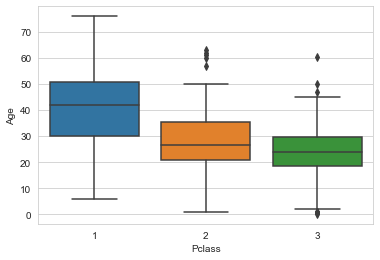

In [87]:
sns.boxplot(x='Pclass', y='Age', data=test)

Here in test data we found that the average age for class 1 is around 41, for class 2 it is around 28 and class 3 is of 24.

In [88]:
def impuge_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 28
        else:
            return 24
        
    else:
        return Age

In [89]:
test['Age'] = test[['Age','Pclass']].apply(impuge_age_test, axis=1)

<AxesSubplot:>

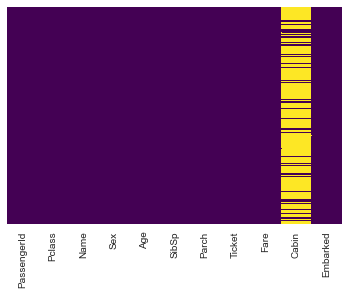

In [90]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [91]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [92]:
test.drop('Cabin', axis=1, inplace=True)

In [93]:
mode = test['Fare'].mode()

In [94]:
mode

0    7.75
dtype: float64

In [95]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

In [96]:
test.index = np.arange(1, len(test)+1)

In [97]:
ID = test['PassengerId']

In [98]:
ID.isnull().sum()

0

In [99]:
embark_test= pd.get_dummies(test['Embarked'], drop_first=True)
embark_test.head()

,Q,S
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1


In [100]:
sex_test = pd.get_dummies(test['Sex'], drop_first=True)
sex_test.head()

,male
1,1
2,0
3,1
4,1
5,0


In [101]:
pclass_test = pd.get_dummies(test['Pclass'], drop_first=True)

In [102]:
pclass_test.head()

,2,3
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1


In [103]:
test.drop(['Sex','Embarked','Name','Ticket','PassengerId','Pclass'], axis=1, inplace=True)

In [104]:
test = pd.concat([test,sex_test,embark_test,pclass_test], axis=1)

In [105]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,34.5,0,0,7.8292,1,1,0,0,1
2,47.0,1,0,7.0000,0,0,1,0,1
3,62.0,0,0,9.6875,1,1,0,1,0
4,27.0,0,0,8.6625,1,0,1,0,1
5,22.0,1,1,12.2875,0,0,1,0,1


## Apply Logistic Regression Model

Now split data into a traing set and test set.

### Train Test Split

In [106]:
df.drop('Survived', axis=1).head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [107]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1),
                                                   df['Survived'], test_size=0.50,
                                                    random_state=101)

### Training and Predicting

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
logmodel = LogisticRegression()

In [164]:
logmodel.fit(X_train, y_train)

C:\Users\Arpit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
predictions = logmodel.predict(X_test)

In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
accuracy = confusion_matrix(y_test,predictions)

In [168]:
accuracy

array([[243,  32],
       [ 53, 118]], dtype=int64)

In [169]:
from sklearn.metrics import accuracy_score

In [170]:
accuracy = accuracy_score(y_test,predictions)

In [171]:
accuracy

0.8094170403587444

In [172]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [173]:
test_prediction = logmodel.predict(test)

In [174]:
test_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [175]:
test_prediction.size

418

In [176]:
pd.get_option('display.max_columns', None)

20

In [177]:
df2 = pd.DataFrame(test_prediction, columns=['Survived'])

In [178]:
df2.index = np.arange(1, len(df2)+1)

In [179]:
df2.head(155)

,Survived
1,0
2,0
3,0
4,0
5,0
...,...
151,1
152,0
153,0
154,0


In [180]:
ID.head(155)

1       892
2       893
3       894
4       895
5       896
       ... 
151    1042
152    1043
153    1044
154    1045
155    1046
Name: PassengerId, Length: 155, dtype: int64

In [181]:
final = pd.concat([ID,df2], axis=1)

In [182]:
final.index = np.arange(1, len(final)+1)

In [183]:
final.tail()

,PassengerId,Survived
414,1305,0
415,1306,1
416,1307,0
417,1308,0
418,1309,0


In [184]:
final.to_csv('Prediction.csv')